In [1]:
#import libraries
# XOR truth table
# X1 X2  Y
# 0  0   0
# 0  1   1
# 1  0   1
# 1  1   0

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

In [3]:
#define sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [4]:
## intializing the paramters i.e. w1 w2 b1 b2
def init_parameters(input_node, hidden_node, output_node):
    W1 = np.random.randn(hidden_node, input_node) ## (2,2)
    W2 = np.random.randn(output_node, hidden_node) ## (1,2)
    b1 = np.zeros((hidden_node,1)) #
    b2 = np.zeros((output_node,1))
    parameters = {"W1": W1, "b1":b1, "W2":W2, "b2": b2}

    return parameters

In [5]:
from pandas import Float64Dtype


def forward_propagation(X,y, parameters):
    length = X.shape[1]
    W1 = parameters["W1"] ## x -(x1, x2) 
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    #input to hidden 
    Z1 = np.dot(W1,X) + b1  # Z1 --> (2,4) Hidden layer ouput
    # pass to sigmoid 
    A1 = sigmoid(Z1)
    ## hidden to output layer  ## output layer output
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2) ## pasiing to sigmoid

    all_parameters = (Z1, A1, W1, b1, Z2, A2, W2, b2)
    ##mean square error
    
    loss_value  = mean_squared_error(A2,y)
    # A2 --> predicted bvalue 
    return loss_value, all_parameters, A2 

In [6]:
# X = np.array([[0,0,1,1],[0,1,0,1]], dtype = float)
# y = np.array([[0,1,1,0]],  dtype = float)

# Model to learn the XOR truth table
# X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]]) # XOR input
# Y = np.array([[0, 1, 1, 0]]) # XOR output

# X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]]) # ANd input
# Y = np.array([[0, 0, 0, 1]]) # AND output

X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]]) # OR input
Y = np.array([[0, 1, 1, 1]]) # OR output
X.shape, y.shape

((2, 4), (1, 4))

In [7]:
input_nodes = 2
hidden_nodes = 2
output_node = 1

In [8]:
## backward fropagation
def BackPropagation(X,y, all_p):
    num_sample = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2) = all_p

    dZ2 = A2-y
    dW2 = np.dot(dZ2,A1.T) / num_sample
    db2 = np.sum(dZ2, axis=1, keepdims = True)

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, A1*(1-A1))
    dW1 = np.dot(dZ1, X.T) / num_sample
    db1 = np.sum(dZ1, axis =1, keepdims = True)/ num_sample

    gradients = {"dZ2": dZ2, "dW2":dW2, "db2":db2,
                  "dZ1": dZ1, "dW1":dW1, "db1":db1 }
    return gradients


In [9]:
def update_theta(parameters, gradients, learning_rate):
    parameters["W1"] = parameters["W1"] - learning_rate * gradients["dW1"]
    parameters["W2"] = parameters["W2"] - learning_rate * gradients["dW2"]
    parameters["b1"] = parameters["b1"] - learning_rate * gradients["db1"]
    parameters["b2"] = parameters["b2"] - learning_rate * gradients["db2"]

    return parameters
    

In [10]:
parameters = init_parameters(input_nodes,hidden_nodes, output_node)

epoch = 100000
learning_rate = 0.01
loss_list = []
for i in range(epoch):
    loss, all_p, A2 = forward_propagation(X,y, parameters)
    loss_list.append(loss)
    if i%100 == 0:
        print("Epoch {} Loss {:.6f} ".format(i, loss))
    ## Backward propagation
    gradients = BackPropagation(X,y, all_p)
    ### update the weights and biases
    parameters = update_theta(parameters, gradients, learning_rate)



Epoch 0 Loss 0.275243 
Epoch 100 Loss 0.253137 
Epoch 200 Loss 0.250563 
Epoch 300 Loss 0.250263 
Epoch 400 Loss 0.250214 
Epoch 500 Loss 0.250195 
Epoch 600 Loss 0.250180 
Epoch 700 Loss 0.250167 
Epoch 800 Loss 0.250154 
Epoch 900 Loss 0.250141 
Epoch 1000 Loss 0.250128 
Epoch 1100 Loss 0.250116 
Epoch 1200 Loss 0.250103 
Epoch 1300 Loss 0.250091 
Epoch 1400 Loss 0.250079 
Epoch 1500 Loss 0.250067 
Epoch 1600 Loss 0.250055 
Epoch 1700 Loss 0.250044 
Epoch 1800 Loss 0.250032 
Epoch 1900 Loss 0.250020 
Epoch 2000 Loss 0.250009 
Epoch 2100 Loss 0.249997 
Epoch 2200 Loss 0.249986 
Epoch 2300 Loss 0.249975 
Epoch 2400 Loss 0.249963 
Epoch 2500 Loss 0.249952 
Epoch 2600 Loss 0.249941 
Epoch 2700 Loss 0.249930 
Epoch 2800 Loss 0.249919 
Epoch 2900 Loss 0.249908 
Epoch 3000 Loss 0.249897 
Epoch 3100 Loss 0.249886 
Epoch 3200 Loss 0.249875 
Epoch 3300 Loss 0.249864 
Epoch 3400 Loss 0.249853 
Epoch 3500 Loss 0.249842 
Epoch 3600 Loss 0.249831 
Epoch 3700 Loss 0.249819 
Epoch 3800 Loss 0.249808

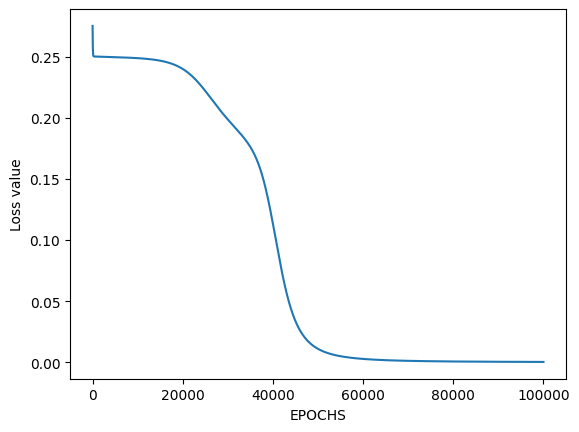

In [11]:
# Evaluating the performance
plt.figure()
plt.plot(range(epoch),loss_list)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()


In [12]:

# Testing
X = np.array([[0, 1, 0, 1], [1, 0, 0, 1]]) # 
cost, _, A2 = forward_propagation(X, y, parameters)
prediction = (A2 > 0.5) * 1.0
print(A2)
print(prediction)

[[0.98380648 0.98495291 0.01774733 0.01515591]]
[[1. 1. 0. 0.]]
